## CS/INFO 5304 Assignment 1: Data Preparation <br />


### Case 1: Actual screen time


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency

In [5]:
# Read individual data
individual_data = pd.read_pickle("./Extrasensory_individual_data.p")

# Read sensor data
sensor_data = pd.read_pickle("./Extrasensory_sensor_data.p")

In [14]:
# Print individual data
print("Individual Data:")
print(individual_data.head())

print(f"number of rows: {individual_data.shape[0]}")

Individual Data:
                                   uuid  age  gender   system  hours_in_study  \
0  3600D531-0C55-44A7-AE95-A7A38519464E   24    male  Android              86   
1  59EEFAE0-DEB0-4FFF-9250-54D2A03D0CF2   31  female  Android             125   
2  CF722AA9-2533-4E51-9FEB-9EAC84EE9AAC   37    male      iOS              60   
3  5152A2DF-FAF3-4BA8-9CA9-E66B32671A53   22    male      iOS             110   
4  136562B6-95B2-483D-88DC-065F28409FD2   19    male  Android             103   

   perceived_average_screen_time  actual_average_screen_time  
0                            4.3                        5.18  
1                            4.2                        2.31  
2                            3.9                       -1.00  
3                           -1.0                        4.75  
4                            1.1                        1.55  
number of rows: 60


In [56]:
# Print sensor data
print("\nSensor Data:")
for participant_id, matrix in sensor_data.items():
    print(f"\nParticipant ID: {participant_id}")
    print(matrix)
    # print(list(matrix.columns))


Sensor Data:

Participant ID: 3600D531-0C55-44A7-AE95-A7A38519464E
      location:raw_latitude  location:raw_longitude  raw_acc:3d:mean_x  \
0                 32.882483             -117.234601           0.022972   
1                 32.882480             -117.234595           0.021403   
2                 32.882482             -117.234587           0.021201   
3                 32.882482             -117.234587           0.021530   
4                 32.882483             -117.234582           0.021198   
...                     ...                     ...                ...   
5198              32.879546             -117.237555          -0.059023   
5199              32.880290             -117.237482          -0.147803   
5200              32.880383             -117.236507          -0.104133   
5201              32.880894             -117.235780          -0.097580   
5202              32.881325             -117.234846          -0.100143   

      raw_acc:3d:mean_y  raw_acc:3d:mean_z 

      location:raw_latitude  location:raw_longitude  raw_acc:3d:mean_x  \
0                 32.882474             -117.234560           0.009499   
1                 32.882466             -117.234561           0.009785   
2                 32.882466             -117.234580           0.010121   
3                 32.882456             -117.234578           0.010491   
4                 32.882477             -117.234564           0.010210   
...                     ...                     ...                ...   
6213              32.882443             -117.234629          -0.747692   
6214              32.882424             -117.234570           0.039543   
6215              32.882433             -117.234611           0.018655   
6216              32.882437             -117.234627           0.017629   
6217              32.882426             -117.234582           0.076355   

      raw_acc:3d:mean_y  raw_acc:3d:mean_z  discrete:app_state:is_active  \
0              0.017503          -0

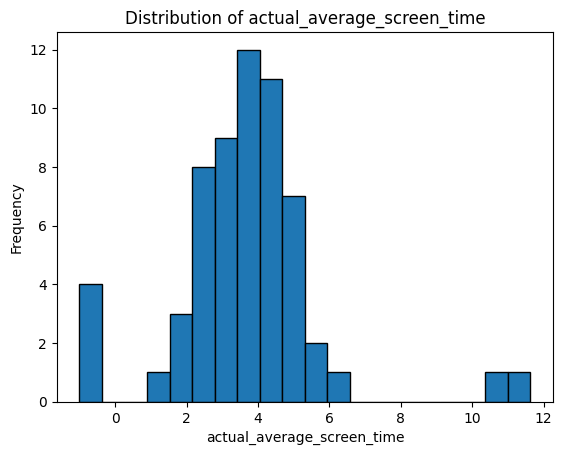

In [11]:
actual_average_screen_time = individual_data['actual_average_screen_time']

# Plot histogram
plt.hist(actual_average_screen_time, bins=20, edgecolor='black')
plt.title('Distribution of actual_average_screen_time')
plt.xlabel('actual_average_screen_time')
plt.ylabel('Frequency')
plt.show()

#### Writeup Answer to Problem A: 
How are missing values represented for this feature?

Missing values are represented with -1.

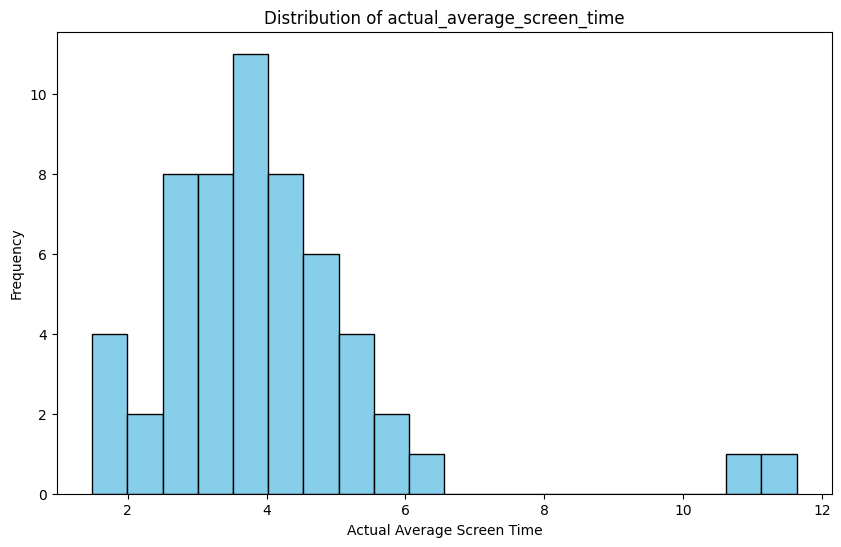

In [17]:
# Ignore missing values temporarily
filtered_data = actual_average_screen_time[actual_average_screen_time != -1]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of actual_average_screen_time')
plt.xlabel('Actual Average Screen Time')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Calculate quartiles and IQR
Q1 = filtered_data.quantile(0.25)
Q3 = filtered_data.quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
outliers = filtered_data[(filtered_data > upper_bound) | (filtered_data < lower_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print(f'Number of outliers: {num_outliers}')
print(f"lower bound: {lower_bound}, upper bound: {upper_bound}")


Number of outliers: 2
lower bound: 1.0975000000000001, upper bound: 6.637499999999999


In [21]:
skewness = filtered_data.skew()
print("Skewness:", skewness)

if skewness < 0:
    print("The distribution is left-skewed.")
elif skewness > 0:
    print("The distribution is right-skewed.")
else:
    print("The distribution is approximately symmetric.")

Skewness: 2.4639261915800215
The distribution is right-skewed.


#### Writeup Answer to Problem B: 
 Does it have outliers?If so, how many?
 Is it skewed? If so, is it left skewed or right skewed? What’s the skewness? 

 Yes, it has 2 outliers.
 Skewness: 2.4639261915800215. The distribution is right-skewed.

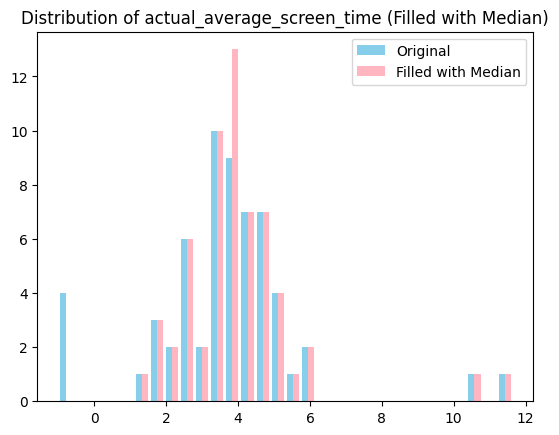

In [27]:
# Filling with median
filled_median = actual_average_screen_time.replace(-1, actual_average_screen_time.median())

# Plot the distribution
plt.hist([actual_average_screen_time, filled_median], bins=30, label=['Original', 'Filled with Median'], color=['skyblue', 'lightpink'])
plt.legend()
plt.title('Distribution of actual_average_screen_time (Filled with Median)')
plt.show()

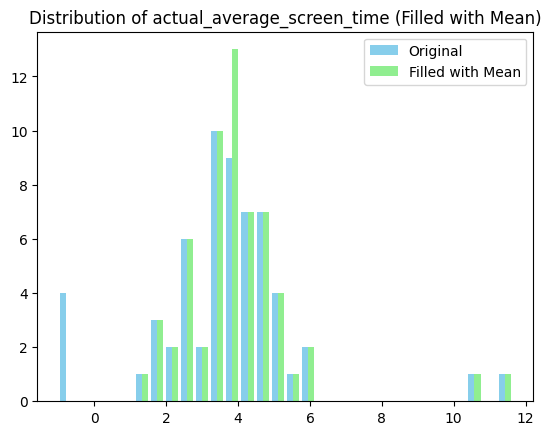

In [28]:
# Filling with mean
filled_mean = actual_average_screen_time.replace(-1, actual_average_screen_time.mean())

# Plot the distribution
plt.hist([actual_average_screen_time, filled_mean], bins=30, label=['Original', 'Filled with Mean'], color=['skyblue', 'lightgreen'])
plt.legend()
plt.title('Distribution of actual_average_screen_time (Filled with Mean)')
plt.show()

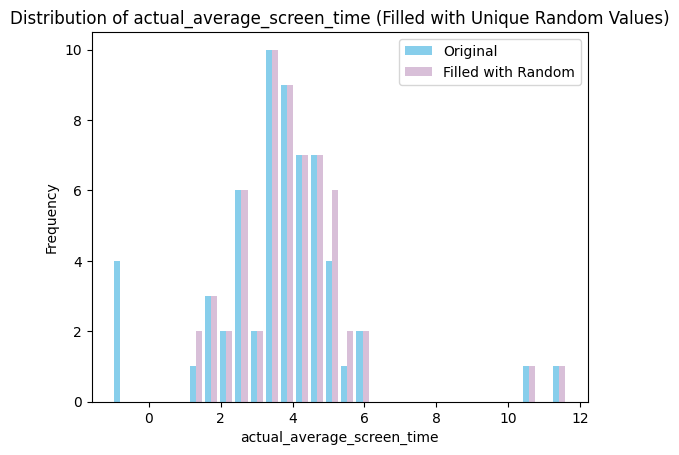

In [39]:
# Identify missing values
missing_values = actual_average_screen_time == -1

# Count the number of missing values
num_missing_values = missing_values.sum()

# Generate unique random values for each missing value
random_values = np.random.uniform(lower_bound, upper_bound, num_missing_values)

# Replace missing values with generated random values
filled_random = actual_average_screen_time.copy()
filled_random[missing_values] = random_values

# Plot the distribution
plt.hist([actual_average_screen_time, filled_random], bins=30, label=['Original', 'Filled with Random'], color=["skyblue", "thistle"])
plt.legend()
plt.title('Distribution of actual_average_screen_time (Filled with Unique Random Values)')
plt.xlabel('actual_average_screen_time')
plt.ylabel('Frequency')
plt.show()


#### Writeup Answer to Problem C: 
How did you choose the random value from method 3)? 
How do the distributions look like after you implement the three filling methods? (Compare them)

Each missing value is randomly assigned with value within a lower bound of 1.09 and an upper bound of 6.637. A number of random values from 0 to 10 are generated based on the number of missing values. Assign the randomly generated values to these missing values is better than assigning them to the same random value. Because in a smaller dataset, doing the latter might greatly affect the distribution of the dataset which might not be accurate at all. The bounds are chosen because that's the lower and upper bound of the IQR, preventing generating an outlier that affects the distribution ans accuracy.

The distributions after filling in median and mean are similar, since the mean and median are close in this case. In these cases, either the mean or the median's frequency is increased by 4. Considering the numbe of participants in this study, the histogram shows that the mode changes before and after the filling, which might not accurately reflect the actual case. The random filling method is a reasonable approach here because it did not change the overall distribution of the dataset. It preserves the variability of the data and avoids imputation bias. Based on the three histograms, filling with random looks the closest to the original shape.


In [42]:
## Case 1 Problem D code and graph# Distribution based on research
research_distribution = np.random.normal(3.85, 1.25, len(actual_average_screen_time))

# Perform t-test
t_stat_median, p_value_median = ttest_ind(research_distribution, filled_median)
t_stat_mean, p_value_mean = ttest_ind(research_distribution, filled_mean)
t_stat_random, p_value_random = ttest_ind(research_distribution, filled_random)

# Report p-values
print("T-Test Results:")
print(f"Filled with Median - p-value: {p_value_median}")
print(f"Filled with Mean - p-value: {p_value_mean}")
print(f"Filled with Random - p-value: {p_value_random}")

T-Test Results:
Filled with Median - p-value: 0.6322981276665354
Filled with Mean - p-value: 0.6378655479100985
Filled with Random - p-value: 0.5486319665117843


#### Answer to Problem D: 
Report the three p-values. Which one of the filling methods reconstruct this feature to be closest to the research distribution? Why do you think this is the case?

T-Test Results:\
Filled with Median - p-value: 0.6322981276665354\
Filled with Mean - p-value: 0.6378655479100985\
Filled with Random - p-value: 0.5486319665117843

Filling with random has the smallest p value.
Filling with random values within the lower and upper bounds of the IQR introduces variability into the dataset while adhering to the overall distribution characteristics. IT allows for a more nuanced and diverse set of values, which can better capture the underlying distribution of the data.

### Case 2: Perceived average screen time

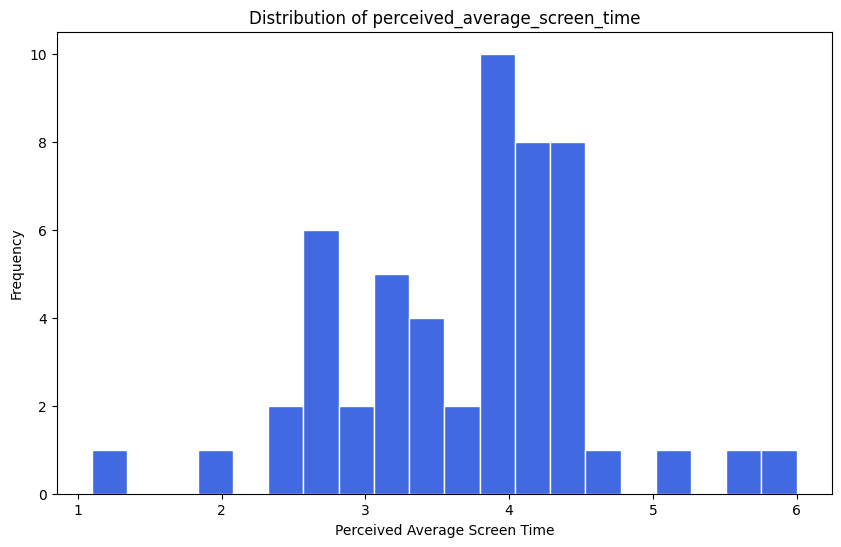

In [100]:
# case 2 problem a code
perceived_average_screen_time = individual_data['perceived_average_screen_time']

# Ignore missing values temporarily
filtered_data_p = perceived_average_screen_time[perceived_average_screen_time != -1]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data_p, bins=20, color='royalblue', edgecolor='white')
plt.title('Distribution of perceived_average_screen_time')
plt.xlabel('Perceived Average Screen Time')
plt.ylabel('Frequency')
plt.show()

In [103]:
# Calculate quartiles and IQR
Q1_p = filtered_data_p.quantile(0.25)
Q3_p = filtered_data_p.quantile(0.75)
IQR_p = Q3_p - Q1_p

# Define upper and lower bounds
upper_bound_p = Q3_p + 1.5 * IQR_p
lower_bound_p = Q1_p - 1.5 * IQR_p

# Identify outliers
outliers_p = filtered_data_p[(filtered_data_p > upper_bound_p) | (filtered_data_p < lower_bound_p)]

# Count the number of outliers
num_outliers = len(outliers_p)

print(f'Number of outliers: {num_outliers}')
print(f"lower bound: {lower_bound_p}, upper bound: {upper_bound_p}")

skewness_p = filtered_data_p.skew()
print("Skewness:", skewness_p)

if skewness_p < 0:
    print("The distribution is left-skewed.")
elif skewness_p > 0:
    print("The distribution is right-skewed.")
else:
    print("The distribution is approximately symmetric.")

Number of outliers: 2
lower bound: 1.45, upper bound: 5.8500000000000005
Skewness: -0.21439363473731404
The distribution is left-skewed.


#### Writeup Answer to Problem A: 
 Does it have outliers?If so, how many?\
 Yes, 2 outliers.

 Is it skewed? If so, is it left skewed or right skewed? What’s the skewness?\
 Left-skewed with a skewnes of -0.2144.


In [108]:
## Case 2 Problem B code

# with outliers
mean_screen_time = perceived_average_screen_time.mean()
std = perceived_average_screen_time.std()

threshold = mean_screen_time + std

intense_users = perceived_average_screen_time[perceived_average_screen_time >= threshold]

num_intense_users = len(intense_users)
print(f'Number of Intense Phone Users: {num_intense_users}')

Number of Intense Phone Users: 3


How many of them are intense phone users?\
3

In [129]:
## Case 2 Problem C code and graph
f_p = individual_data[individual_data['actual_average_screen_time'] != -1]
f_p = f_p['perceived_average_screen_time']
isMissing = f_p == -1
isIntense = f_p >= threshold

contingency_table = pd.crosstab(isMissing, isIntense)
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-square value: {chi2}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('The two distributions are correlated.')
else:
    print('There is no significant correlation between the two distributions.')

Chi-square value: 0.0
P-value: 1.0
There is no significant correlation between the two distributions.


What is the p-value? Do you think they are correlated? What does this mean? Do you think this feature is MAR or MNAR?

 A p-value of 1.0 suggests that there is no significant correlation between the two distributions.\
 If missing perceived_average_screen_time is unrelated to the intensity of phone usage after accounting for actual_average_screen_time, it implies that the missingness is likely random or related to other observed variables. This would align with the MAR mechanism, where the probability of missingness depends on observed variables.

### Case 3: Location

In [95]:
# Assuming sensor_data is a dictionary where keys are participant IDs and values are DataFrames
filtered_participants = []

for participant_id, matrix in sensor_data.items():
    # Extract battery level and location data
    battery_level = matrix['lf_measurements:battery_level']
    location_data = matrix['location:raw_latitude']

    # Filter participants who have NaN in location data when battery level is below 20%
    if ((battery_level < 20) & location_data.isna()).all():
        filtered_participants.append(participant_id)

print("Participants who turn off location service when battery level is below 20%:")
for participant_id in filtered_participants:
    print(participant_id)


Participants who turn off location service when battery level is below 20%:
CDA3BBF7-6631-45E8-85BA-EEB416B32A3C


explanation of implementation:

To find individuals who consistently have missing location data when their battery level is below 20%, we can first iterate through each participant in sensor_data.
For each participant, extract the 'lf_measurements:battery_level' and 'location:raw_latitude' columns. Check if the battery level is less than 20 and location_data is missing. If the condition is met, the participant is identified as having missing location data when battery level is below 20%.

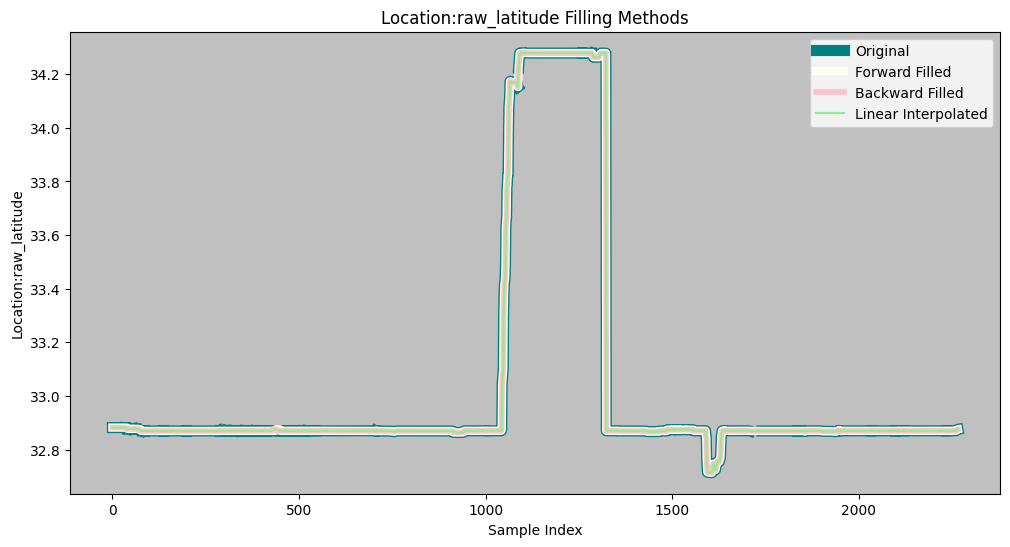

In [96]:
# Assuming sensor_data is a dictionary where keys are participant IDs and values are DataFrames
subject_id = 'F50235E0-DD67-4F2A-B00B-1F31ADA998B9'
subject_data = sensor_data.get(subject_id)

# Check if subject_data exists
if subject_data is not None:
    # Extract location data
    location_data = subject_data['location:raw_latitude']

    # Original trace
    original_trace = location_data.copy()

    # Forward filling
    filled_forward = location_data.ffill()

    # Backward filling
    filled_backward = location_data.bfill()

    # Linear interpolation
    filled_interpolated = location_data.interpolate(method='linear')

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.axes().set_facecolor("silver")
    plt.plot(original_trace, label='Original', linewidth=8, color='teal')
    plt.plot(filled_forward, label='Forward Filled', linewidth=6,color='ivory')
    plt.plot(filled_backward, label='Backward Filled', linewidth=4, color='pink')
    plt.plot(filled_interpolated, label='Linear Interpolated', color='lightgreen')
    plt.title('Location:raw_latitude Filling Methods')
    plt.xlabel('Sample Index')
    plt.ylabel('Location:raw_latitude')
    plt.legend()
    plt.show()
else:
    print(f"Subject {subject_id} not found in sensor_data.")


Compare the 4 traces. What do you see? If you were to use this dataset for further analysis, which filling method will you choose?

Since the three methods are sitting on top of each other, it suggests that the missing values are relatively few and that the chosen filling methods have similar outcomes. In this case we can choose forward filling or backward filling because of their simplicity unless there's a specific need to capture more complex patterns.
